In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажуємо прогнози з першого ноутбука цього розділу
# (або розраховуємо їх заново)
# ЗМІНА ТУТ: index_col='DateTime' -> index_col=0
predictions_df = pd.read_csv('../data/all_predictions.csv', index_col=0, parse_dates=True)

# Даємо індексу назву для зручності (опціонально)
predictions_df.index.name = 'DateTime'

# Розраховуємо залишки для найкращої моделі
residuals = predictions_df['Actual'] - predictions_df['XGBoost_Tuned']

print("Дані та залишки успішно розраховані.")
display(predictions_df.head())

Дані та залишки успішно розраховані.


,Actual,SARIMA,XGBoost_Tuned
DateTime,,,
2010-01-01,316.064,397.842964,298.40253
2010-01-02,131.896,343.849635,509.64750
2010-01-03,827.060,519.496095,616.47876
2010-01-04,0.000,517.696769,221.71959
2010-01-05,460.574,180.780978,226.85396


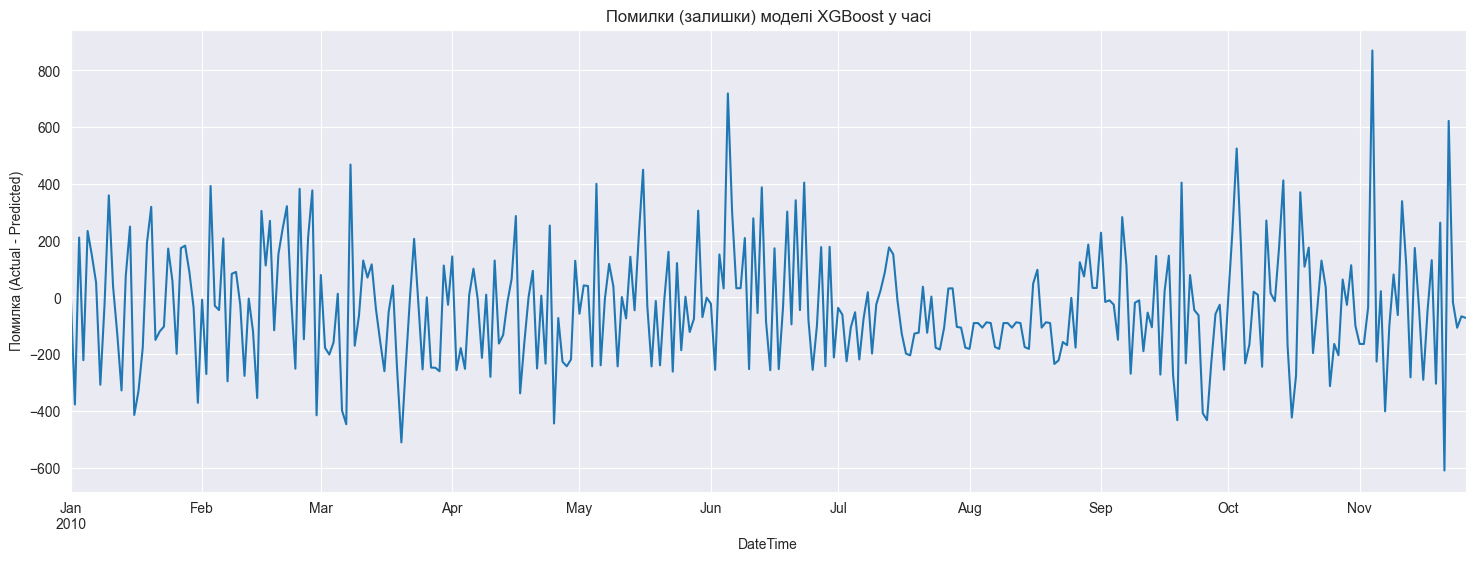

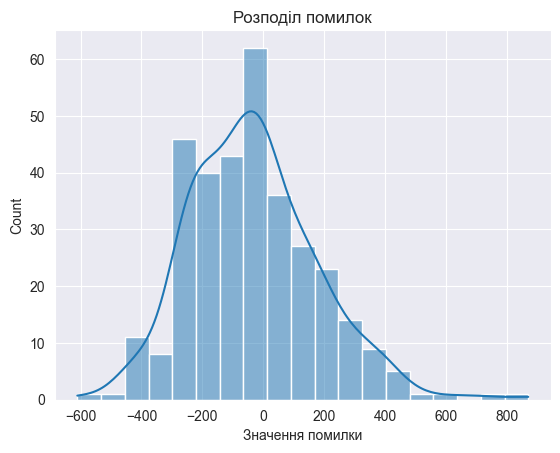

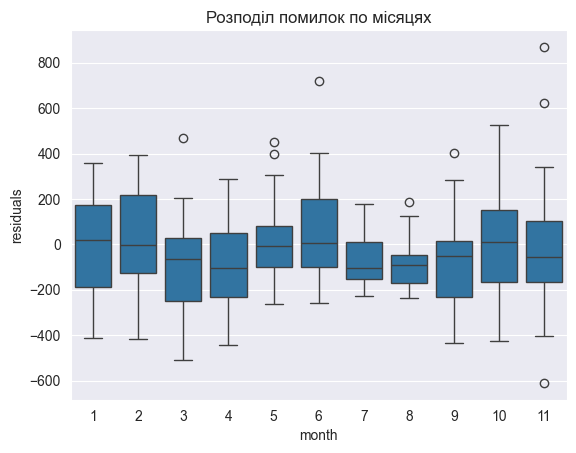

In [5]:
# 1. Графік залишків у часі
residuals.plot(title='Помилки (залишки) моделі XGBoost у часі', figsize=(18, 6))
plt.ylabel('Помилка (Actual - Predicted)')
plt.show()

# 2. Гістограма розподілу залишків
sns.histplot(residuals, kde=True)
plt.title('Розподіл помилок')
plt.xlabel('Значення помилки')
plt.show()

# 3. Аналіз помилок по місяцях
residuals_df = pd.DataFrame({'residuals': residuals, 'month': residuals.index.month})
sns.boxplot(x='month', y='residuals', data=residuals_df)
plt.title('Розподіл помилок по місяцях')
plt.show()